In [2]:
# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import datetime


In [3]:
#read the games details data
df = pd.read_csv('mergedata.csv')

df.head()


,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME,OPP_RANK,PL_RATING,OPP_RATING
0,0,22200415,1610612744,GSW,Golden State,201939,Stephen Curry,Stephen,G,NaN,...,0.465,0.862,0.424,27.0,46.0,1,0,0.389,22.6,112.6
1,1,22200410,1610612744,GSW,Golden State,201939,Stephen Curry,Stephen,G,NaN,...,0.400,0.789,0.400,25.0,37.0,1,0,0.649,25.0,107.6
2,2,22200392,1610612744,GSW,Golden State,201939,Stephen Curry,Stephen,G,NaN,...,0.437,0.731,0.300,17.0,39.0,1,1,0.472,23.6,118.8
3,3,22200359,1610612744,GSW,Golden State,201939,Stephen Curry,Stephen,G,NaN,...,0.478,0.611,0.385,26.0,47.0,0,1,0.389,27.8,109.8
4,4,22200342,1610612744,GSW,Golden State,201939,Stephen Curry,Stephen,G,NaN,...,0.440,0.900,0.107,17.0,45.0,1,1,0.278,26.2,116.2


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1102 non-null   int64  
 1   GAME_ID            1102 non-null   int64  
 2   TEAM_ID            1102 non-null   int64  
 3   TEAM_ABBREVIATION  1102 non-null   object 
 4   TEAM_CITY          1102 non-null   object 
 5   PLAYER_ID          1102 non-null   int64  
 6   PLAYER_NAME        1102 non-null   object 
 7   NICKNAME           122 non-null    object 
 8   START_POSITION     1025 non-null   object 
 9   COMMENT            37 non-null     object 
 10  MIN                1065 non-null   object 
 11  FGM                1065 non-null   float64
 12  FGA                1065 non-null   float64
 13  FG_PCT             1065 non-null   float64
 14  FG3M               1065 non-null   float64
 15  FG3A               1065 non-null   float64
 16  FG3_PCT            1065 

In [5]:
df.columns


Index(['Unnamed: 0', 'GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY',
       'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS', 'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'HOME', 'OPP_RANK', 'PL_RATING',
       'OPP_RATING'],
      dtype='object')

In [6]:
#create a list of games won by player
won=[]

team_won = 0
for ind in df.index:
  if (df['HOME'][ind] == 1 and df['HOME_TEAM_WINS'][ind] == 1) or (df['HOME'][ind] == 0 and df['HOME_TEAM_WINS'][ind] == 0):
    team_won = 1
  else:
    team_won = 0

  won.append(team_won)

print(won)

[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 

In [7]:
df['WON'] = won
df.head()


,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME,OPP_RANK,PL_RATING,OPP_RATING,WON
0,0,22200415,1610612744,GSW,Golden State,201939,Stephen Curry,Stephen,G,NaN,...,0.862,0.424,27.0,46.0,1,0,0.389,22.6,112.6,0
1,1,22200410,1610612744,GSW,Golden State,201939,Stephen Curry,Stephen,G,NaN,...,0.789,0.400,25.0,37.0,1,0,0.649,25.0,107.6,0
2,2,22200392,1610612744,GSW,Golden State,201939,Stephen Curry,Stephen,G,NaN,...,0.731,0.300,17.0,39.0,1,1,0.472,23.6,118.8,1
3,3,22200359,1610612744,GSW,Golden State,201939,Stephen Curry,Stephen,G,NaN,...,0.611,0.385,26.0,47.0,0,1,0.389,27.8,109.8,0
4,4,22200342,1610612744,GSW,Golden State,201939,Stephen Curry,Stephen,G,NaN,...,0.900,0.107,17.0,45.0,1,1,0.278,26.2,116.2,1


In [8]:
#drop unnecessary columns from the dataframe
cols = ['Unnamed: 0','GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID','PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT',
        'GAME_DATE_EST','GAME_STATUS_TEXT','HOME_TEAM_ID', 'VISITOR_TEAM_ID','TEAM_ID_home', 'TEAM_ID_away' ]

df = df.drop(cols, axis=1,)
df.columns

Index(['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',
       'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS',
       'HOME', 'OPP_RANK', 'PL_RATING', 'OPP_RATING', 'WON'],
      dtype='object')

In [9]:
df.head()

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME,OPP_RANK,PL_RATING,OPP_RATING,WON
0,29:33,11.0,19.0,0.579,5.0,10.0,0.500,11.0,11.0,1.000,...,0.862,0.424,27.0,46.0,1,0,0.389,22.6,112.6,0
1,27:19,6.0,17.0,0.353,3.0,10.0,0.300,5.0,5.0,1.000,...,0.789,0.400,25.0,37.0,1,0,0.649,25.0,107.6,0
2,37:26,12.0,21.0,0.571,6.0,11.0,0.545,2.0,2.0,1.000,...,0.731,0.300,17.0,39.0,1,1,0.472,23.6,118.8,1
3,37:42,3.0,17.0,0.176,2.0,10.0,0.200,4.0,4.0,1.000,...,0.611,0.385,26.0,47.0,0,1,0.389,27.8,109.8,0
4,34:32,10.0,21.0,0.476,8.0,17.0,0.471,2.0,3.0,0.667,...,0.900,0.107,17.0,45.0,1,1,0.278,26.2,116.2,1


In [10]:
# check for duplicate values in the data
df.duplicated().sum()


0

In [11]:
df.describe()


,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME,OPP_RANK,PL_RATING,OPP_RATING,WON
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,...,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,973.000000,1102.000000,1102.000000
mean,8.281690,17.592488,0.465843,3.779343,8.953052,0.412660,3.992488,4.411268,0.788977,0.663850,...,0.767499,0.358709,23.960073,43.287659,0.598004,0.503630,0.505269,24.279342,104.065336,0.642468
std,3.346737,5.380026,0.126603,2.353039,3.963847,0.189584,3.065381,3.268939,0.336927,0.866925,...,0.100280,0.099563,5.596340,6.415369,0.490524,0.500214,0.186734,6.051884,7.821023,0.479491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.423000,0.067000,10.000000,23.000000,0.000000,0.000000,0.000000,0.000000,84.400000,0.000000
25%,6.000000,14.000000,0.389000,2.000000,6.000000,0.286000,2.000000,2.000000,0.750000,0.000000,...,0.704500,0.289000,20.000000,39.000000,0.000000,0.000000,0.364000,20.800000,98.600000,0.000000
50%,8.000000,18.000000,0.467000,3.000000,9.000000,0.400000,4.000000,4.000000,1.000000,0.000000,...,0.769000,0.359000,24.000000,43.000000,1.000000,1.000000,0.500000,24.600000,103.800000,1.000000
75%,11.000000,21.000000,0.548000,5.000000,11.000000,0.533000,6.000000,6.000000,1.000000,1.000000,...,0.840000,0.424750,28.000000,48.000000,1.000000,1.000000,0.636000,28.200000,109.750000,1.000000
max,20.000000,36.000000,1.000000,13.000000,22.000000,1.000000,18.000000,19.000000,1.000000,5.000000,...,1.000000,0.783000,46.000000,67.000000,1.000000,1.000000,1.000000,44.800000,127.200000,1.000000


In [12]:
df.value_counts('HOME_TEAM_WINS')

HOME_TEAM_WINS
1    659
0    443
Name: count, dtype: int64

<Axes: xlabel='FGM', ylabel='Count'>

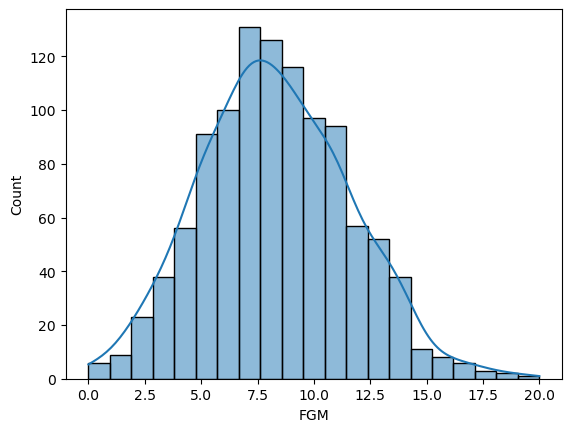

In [13]:
#DISTRIBUTION OF FIELD GOALS MADE BY THE PLAYER
sns.histplot(data = df, x = "FGM", kde = True)


<Axes: xlabel='FGA', ylabel='Count'>

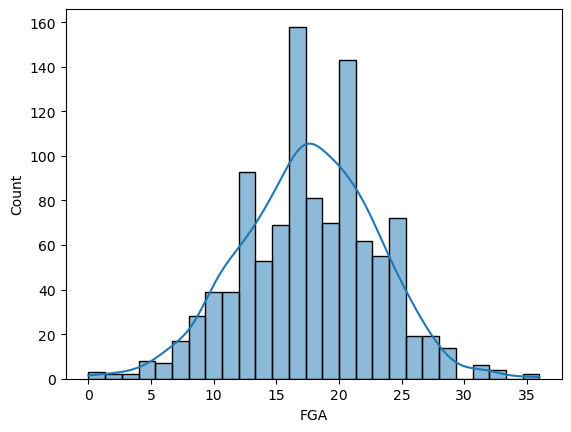

In [14]:
#DISTRIBUTION OF FIELD GOALS ATTEMPTED BY THE PLAYER
sns.histplot(data = df, x = "FGA", kde = True)

<Axes: xlabel='FG_PCT', ylabel='Count'>

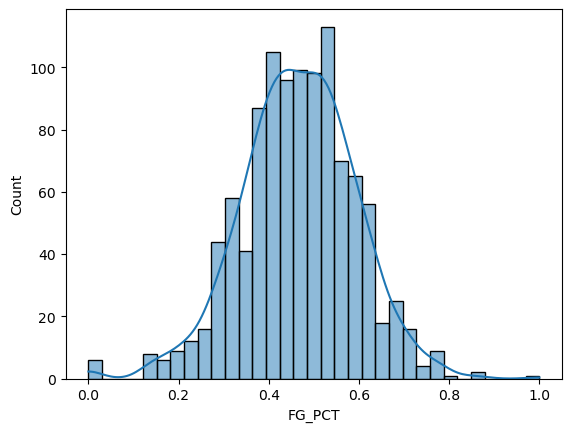

In [15]:
#DISTRIBUTION OF FIELD GOALS PERCENTAGE BY THE PLAYER
sns.histplot(data = df, x = "FG_PCT", kde = True)

<Axes: xlabel='FG3M', ylabel='Count'>

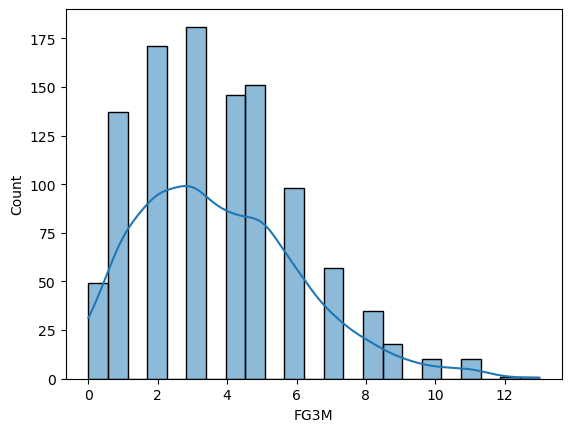

In [16]:
#DISTRIBUTION OF 3 POINTS FIELD GOALS MADE BY THE PLAYER
sns.histplot(data = df, x = "FG3M", kde = True)

<Axes: xlabel='FG3A', ylabel='Count'>

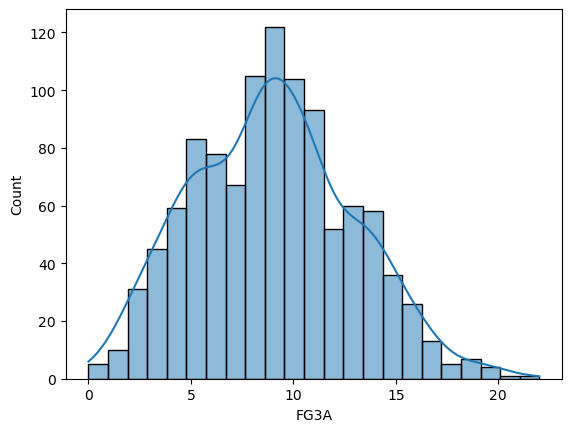

In [17]:
#DISTRIBUTION OF 3 POINTS FIELD GOALS ATTEMPTED BY THE PLAYER
sns.histplot(data = df, x = "FG3A", kde = True)

<Axes: xlabel='FG3_PCT', ylabel='Count'>

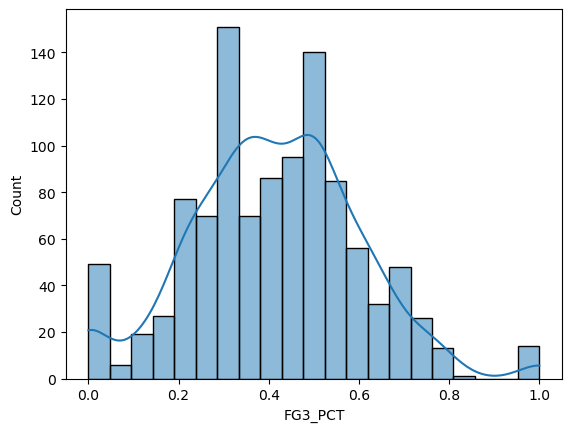

In [18]:
#DISTRIBUTION OF 3 POINTS FIELD GOALS PERCENTAGE BY THE PLAYER
sns.histplot(data = df, x = "FG3_PCT", kde = True)

<Axes: xlabel='FTM', ylabel='Count'>

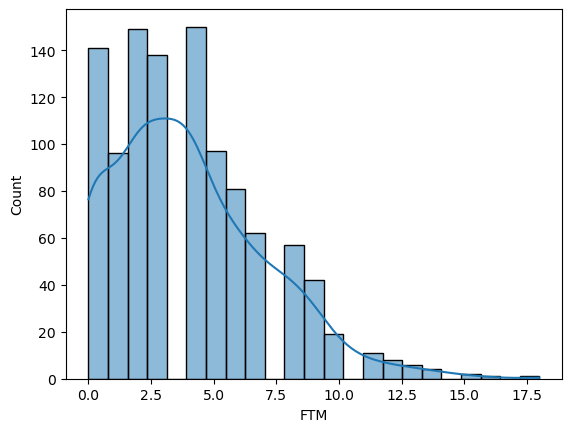

In [19]:
#DISTRIBUTION OF FREE THROWS MADE BY THE PLAYER
sns.histplot(data = df, x = "FTM", kde = True)

<Axes: xlabel='FTA', ylabel='Count'>

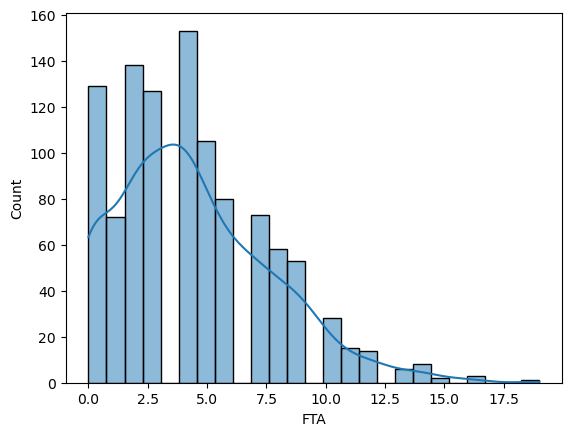

In [20]:
#DISTRIBUTION OF FREE THROWS ATTEMPTED BY THE PLAYER
sns.histplot(data = df, x = "FTA", kde = True)

<Axes: xlabel='FT_PCT', ylabel='Count'>

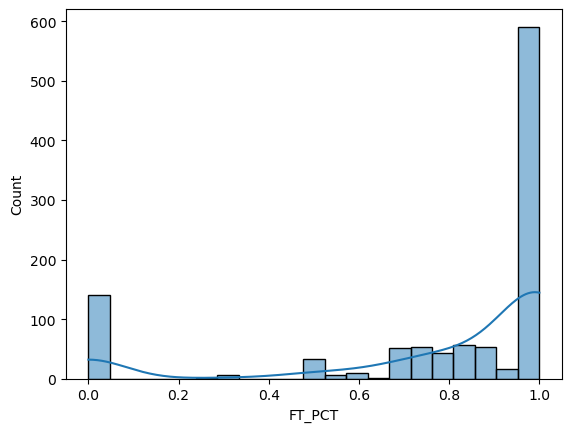

In [21]:
#DISTRIBUTION OF FREE THROWS PERCENTAGE BY THE PLAYER
sns.histplot(data = df, x = "FT_PCT", kde = True)

<Axes: xlabel='OREB', ylabel='Count'>

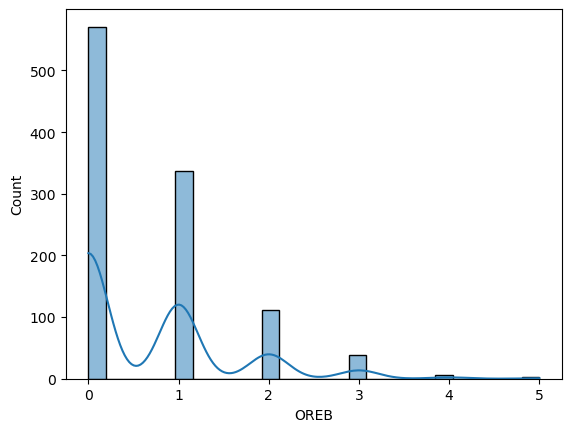

In [22]:
#DISTRIBUTION OF OFFENSIVE REBOUNDS MADE BY THE PLAYER
sns.histplot(data = df, x = "OREB", kde = True)

<Axes: xlabel='DREB', ylabel='Count'>

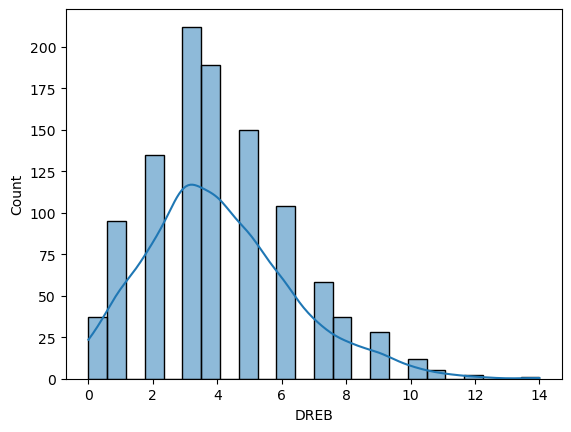

In [23]:
#DISTRIBUTION OF DEFENSIVE REBOUNDS MADE BY THE PLAYER
sns.histplot(data = df, x = "DREB", kde = True)

<Axes: xlabel='REB', ylabel='Count'>

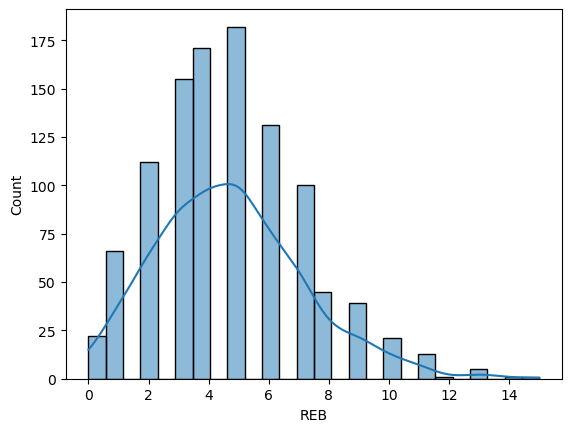

In [24]:
#DISTRIBUTION OF TOTAL REBOUNDS MADE BY THE PLAYER
sns.histplot(data = df, x = "REB", kde = True)

<Axes: xlabel='AST', ylabel='Count'>

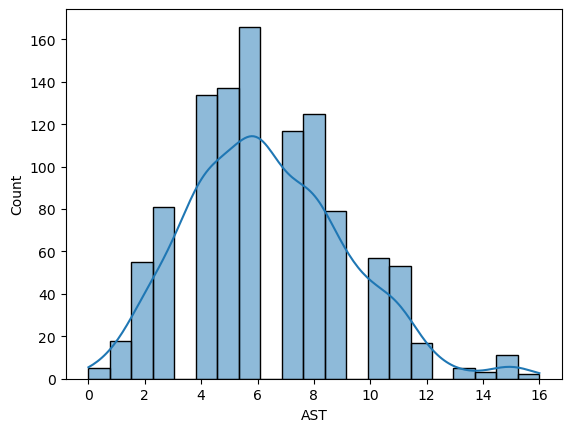

In [25]:
#DISTRIBUTION OF ASSISTS MADE BY THE PLAYER
sns.histplot(data = df, x = "AST", kde = True)

<Axes: xlabel='STL', ylabel='Count'>

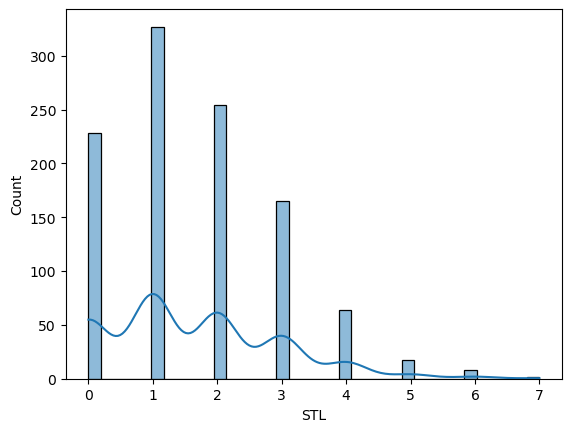

In [26]:
#DISTRIBUTION OF OFFENSIVE STEALS MADE BY THE PLAYER
sns.histplot(data = df, x = "STL", kde = True)

<Axes: xlabel='BLK', ylabel='Count'>

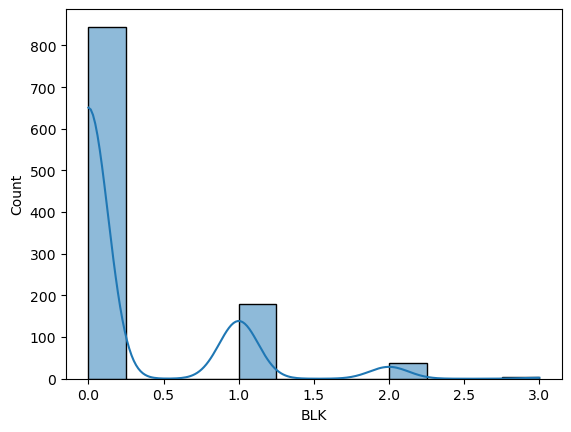

In [27]:
#DISTRIBUTION OF BLOCKS MADE BY THE PLAYER
sns.histplot(data = df, x = "BLK", kde = True)

<Axes: xlabel='TO', ylabel='Count'>

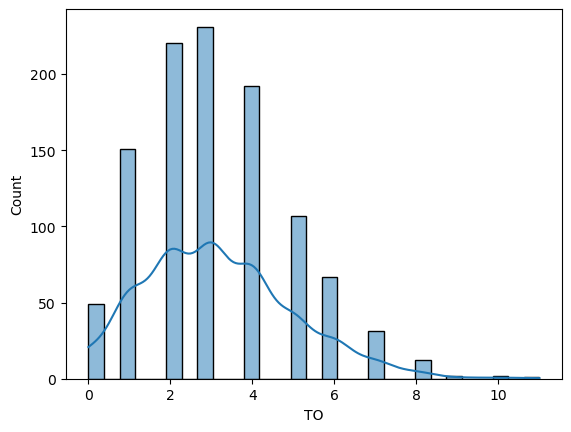

In [28]:
#DISTRIBUTION OF TURNOVERS MADE BY THE PLAYER
sns.histplot(data = df, x = "TO", kde = True)

<Axes: xlabel='PF', ylabel='Count'>

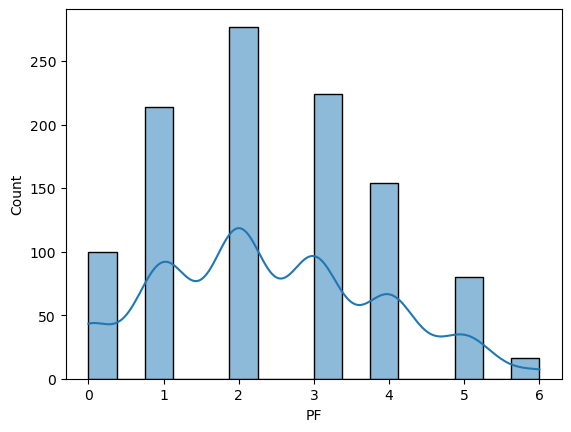

In [29]:
#DISTRIBUTION OF PERSONAL FOULS MADE BY THE PLAYER
sns.histplot(data = df, x = "PF", kde = True)

<Axes: xlabel='PTS', ylabel='Count'>

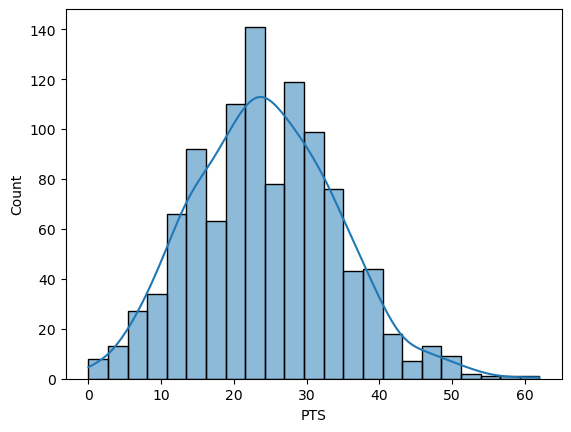

In [30]:
#DISTRIBUTION OF TOTAL POINTS MADE BY THE PLAYER
sns.histplot(data = df, x = "PTS", kde = True)

<Axes: xlabel='PLUS_MINUS', ylabel='Count'>

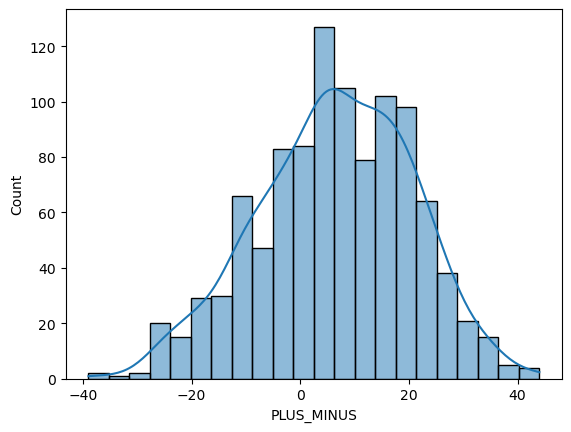

In [31]:
#DISTRIBUTION OF PLUS-MINUS BY THE PLAYER
sns.histplot(data = df, x = "PLUS_MINUS", kde = True)

<Axes: xlabel='PL_RATING', ylabel='Count'>

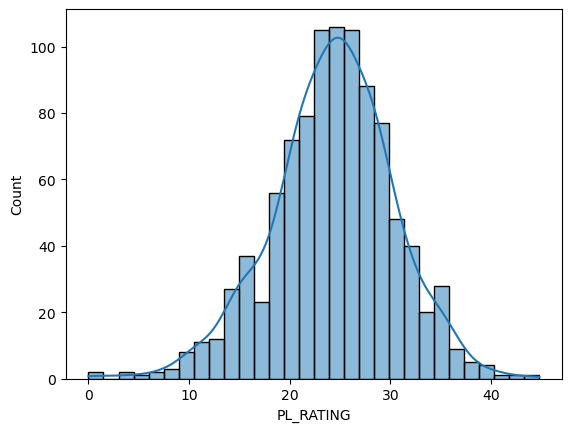

In [32]:
#DISTRIBUTION OF PL_RATING
sns.histplot(data = df, x = "PL_RATING", kde = True)

<Axes: xlabel='PTS', ylabel='SEASON'>

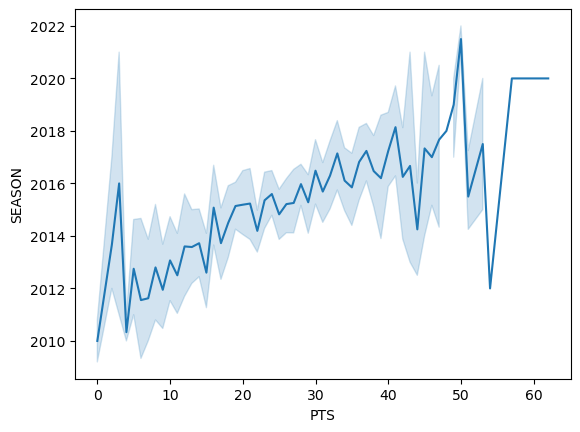

In [33]:
# draw lineplot
sns.lineplot(x="PTS", y="SEASON", data=df)

<Axes: xlabel='PTS', ylabel='SEASON'>

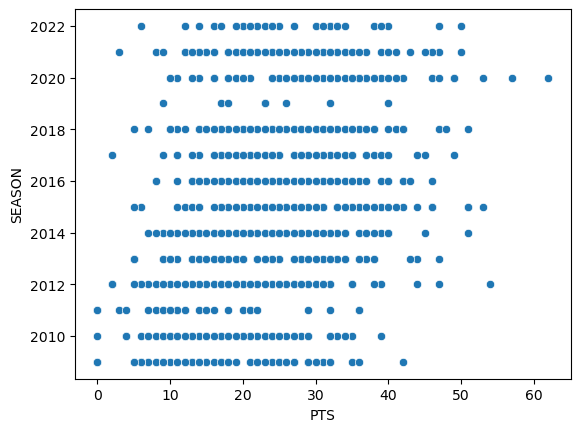

In [34]:

sns.scatterplot(x="PTS",
                    y="SEASON",
                    data=df)

<Axes: xlabel='HOME_TEAM_WINS', ylabel='Count'>

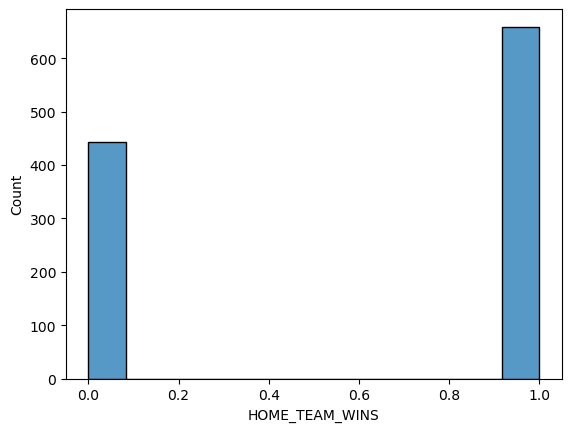

In [35]:
sns.histplot(x = "HOME_TEAM_WINS", data = df)

<Axes: xlabel='WON', ylabel='Count'>

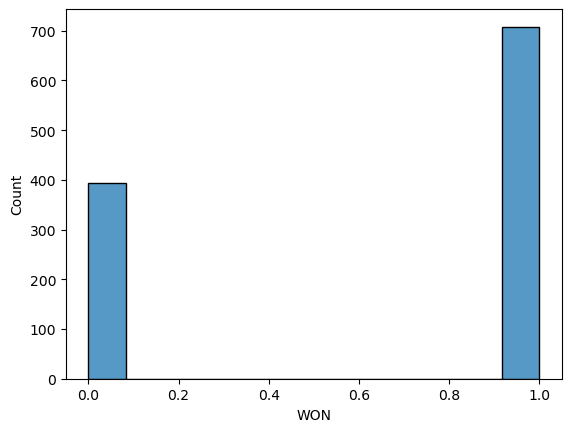

In [36]:
#DISTRIBUTION OF GAMES WON BY THE PLAYER
sns.histplot(x = "WON", data = df)

<Axes: xlabel='OPP_RATING', ylabel='Count'>

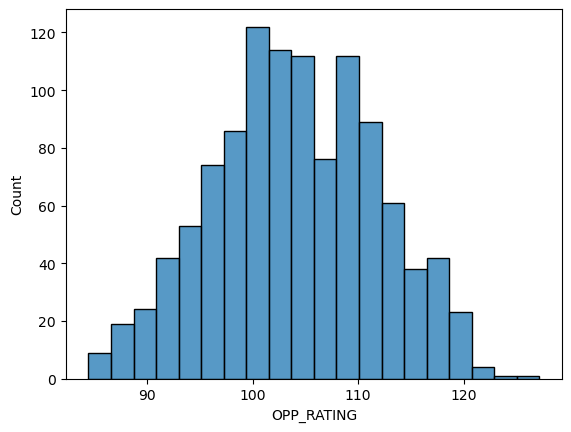

In [37]:
#DISTRIBUTION OF OPPOSITION RATING FACED BY THE PLAYER
sns.histplot(x = "OPP_RATING", data = df)

<Axes: xlabel='OPP_RANK', ylabel='Count'>

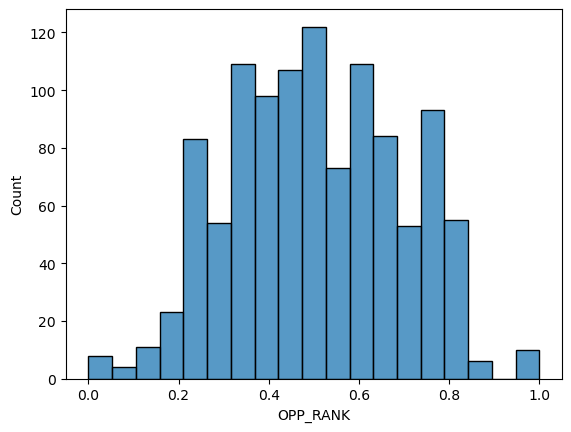

In [38]:
#DISTRIBUTION OF OPPOSITION RANKING FACED BY THE PLAYER
sns.histplot(x = "OPP_RANK", data = df)

<Axes: xlabel='PTS', ylabel='OPP_RANK'>

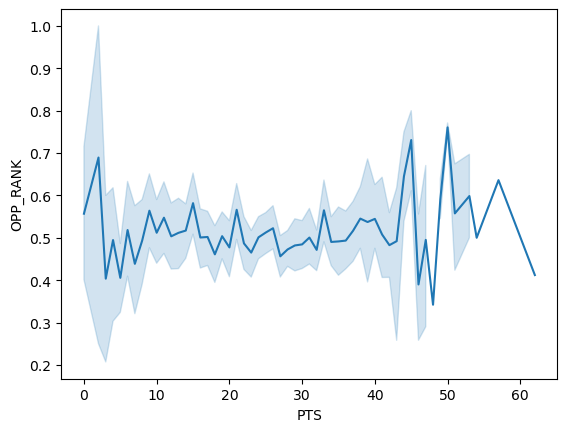

In [39]:
sns.lineplot(x="PTS", y="OPP_RANK", data=df)

<Axes: xlabel='OPP_RATING', ylabel='PL_RATING'>

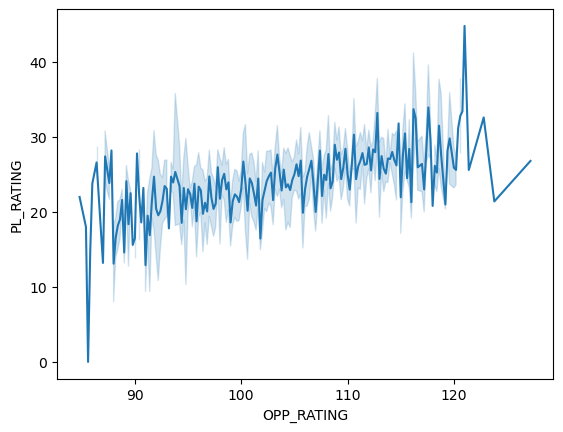

In [40]:
sns.lineplot(x="OPP_RATING", y="PL_RATING", data=df)

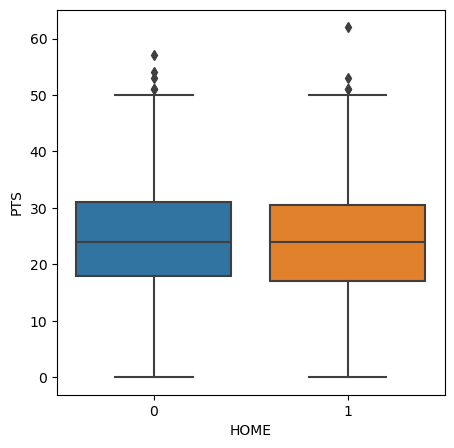

In [41]:
#EFFECT OF HOME ADVANTAGE ON PLAYER
plt.figure(figsize=(5,5))
sns.boxplot(y='PTS',x='HOME',data=df)
plt.show()

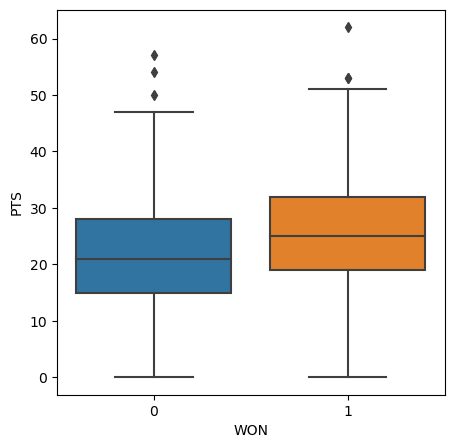

In [42]:
#EFFECT OF PLAYER POINTS ON GAMES WON OR LOST
plt.figure(figsize=(5,5))
sns.boxplot(y='PTS',x='WON',data=df)
plt.show()

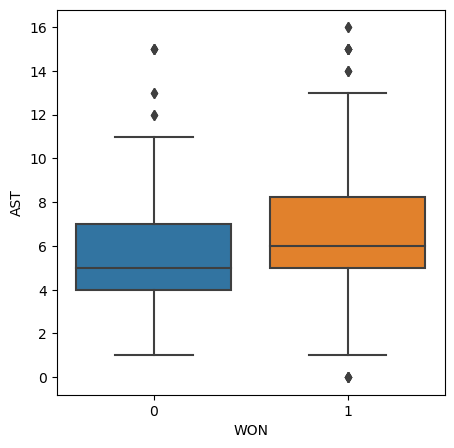

In [43]:
#EFFECT OF PLAYER ASSISTS ON GAMES WON OR LOST
plt.figure(figsize=(5,5))
sns.boxplot(y='AST',x='WON',data=df)
plt.show()

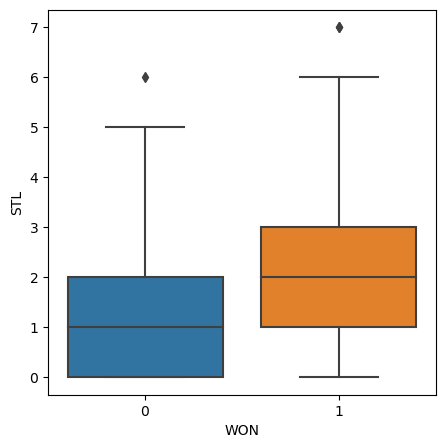

In [44]:
#EFFECT OF PLAYER STEALS ON GAMES WON OR LOST
plt.figure(figsize=(5,5))
sns.boxplot(y='STL',x='WON',data=df)
plt.show()

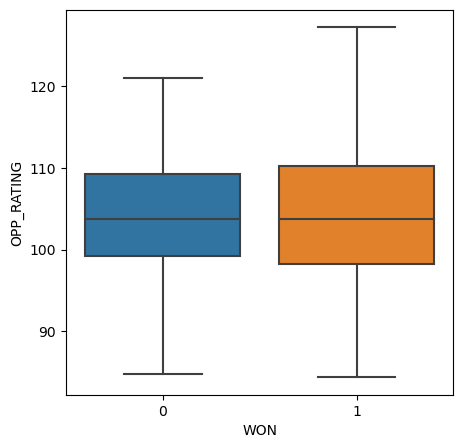

In [45]:
#EFFECT OF OPPOSITION RATING ON GAMES WON OR LOST
plt.figure(figsize=(5,5))
sns.boxplot(y='OPP_RATING',x='WON',data=df)
plt.show()

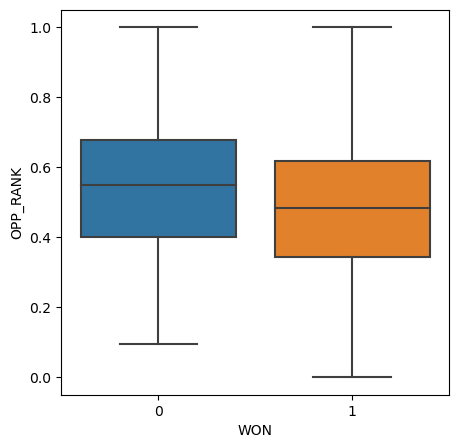

In [46]:
#EFFECT OF PLAYER POINTS ON GAMES WON OR LOST
plt.figure(figsize=(5,5))
sns.boxplot(y='OPP_RANK',x='WON',data=df)
plt.show()

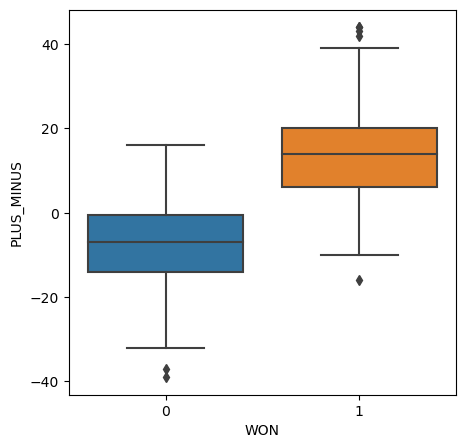

In [20]:
#EFFECT OF PLAYER POINTS ON GAMES WON OR LOST
plt.figure(figsize=(5,5))
sns.boxplot(y='PLUS_MINUS',x='WON',data=df)
plt.show()

In [15]:
df = df.drop("MIN", axis=1)


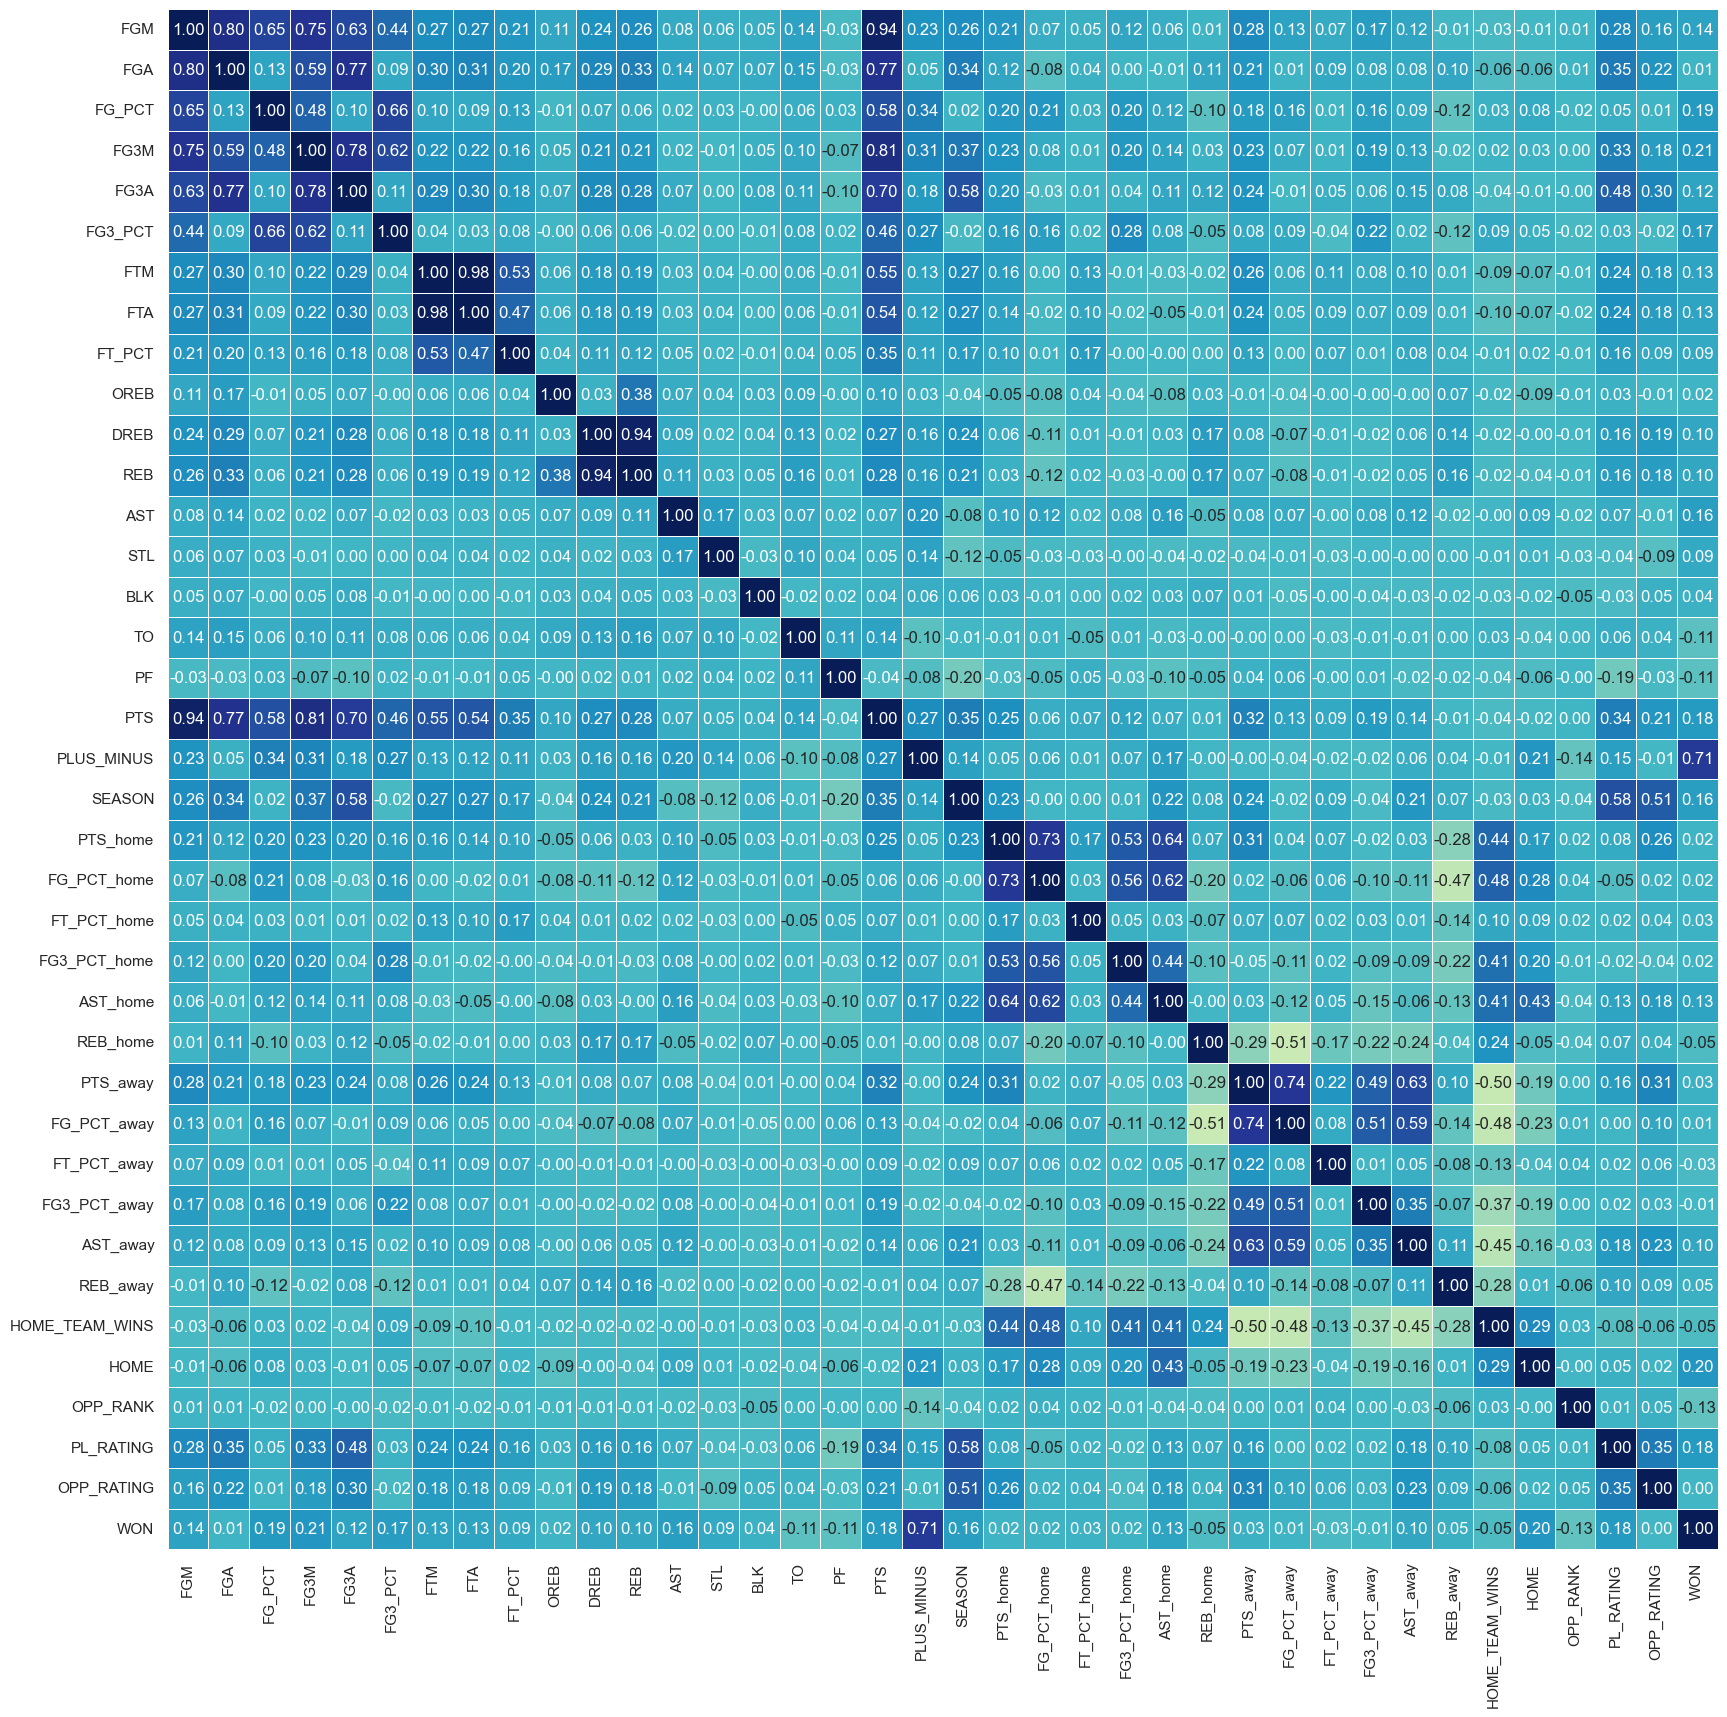

In [16]:
# Plotting correlation heatmap of the attributes
sns.set(rc={"figure.figsize": (20, 20)})
sns.heatmap(
    df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()


In [20]:
#save to csv
df.to_csv('final_df.csv')